## Analysis of RNA Seq data 

The discovery and collection of genetic data along with the growth of scientific computing and the popularisation allows for individuals to perform interesting work and share results, source code, methodologies and figures.

Following below I have attempted to perfoem a reproducable analysis on [RNA Seq][] data of [Pancreatic Adenocarcinoma (PAAD)][1]

[1]:https://en.wikipedia.org/wiki/Pancreatic_cancer
[RNA Seq]:https://bitesizebio.com/13542/what-everyone-should-know-about-rna-seq/

## Exploratory Analysis
### Preprocessing, Cleanining and Setting up an Environemnt 

Import essential libraries

In [5]:
import os

import numpy as np
import pandas as pd

Now we shall assign some global definitions that we will use throught this analysis

In [6]:
# downloaded data files are in the data folder
os.environ['WORKDIR'] = 'data'

# toggle and view the contents of data folder
!ls -lh $WORKDIR
!cd

total 46432
-rwxr-xr-x@ 1 vanisingh  staff    23M Jan  2 23:35 PAAD.gct
-rwxr-xr-x@ 1 vanisingh  staff   6.7K Jan 24 01:36 type1_IFN.docx
-rwxr-xr-x@ 1 vanisingh  staff   142B Nov 26  2018 type1_IFN.txt


In [7]:
#import library to read gct file
from cmapPy.pandasGEXpress.parse import parse

IFN = pd.read_csv(os.environ['WORKDIR']+'/type1_IFN.txt', header = None)

PAAD_rna = parse(os.environ['WORKDIR']+'/PAAD.gct')

# shape of dataframe
print(PAAD_rna.data_df.shape)

# print header
display(PAAD_rna.data_df[:5])

# print attributes of the GCTtoo class
#dir(PAAD_RNA)

(18465, 183)


cid,aab1-Primary solid Tumor,aab4-Primary solid Tumor,aab6-Primary solid Tumor,aab8-Primary solid Tumor,aab9-Primary solid Tumor,aaba-Primary solid Tumor,aabe-Primary solid Tumor,aabf-Primary solid Tumor,aabh-Primary solid Tumor,aabi-Primary solid Tumor,...,aauh-Primary solid Tumor,aaui-Primary solid Tumor,aaul-Primary solid Tumor,a8t3-Primary solid Tumor,a8t5-Primary solid Tumor,a89d-Solid Tissue Normal,a89d-Primary solid Tumor,a8sy-Primary solid Tumor,a8lh-Primary solid Tumor,aapl-Primary solid Tumor
rid,,,,,,,,,,,,,,,,,,,,,
SLC35E2,7.45,8.1,7.2,8.0,7.65,8.1,8.2,8.2,7.55,8.45,...,8.45,7.95,8.3,8.05,8.2,7.25,7.4,7.35,7.2,9.05
A1BG,6.40,5.8,6.4,5.8,6.70,6.6,6.3,6.5,5.70,6.30,...,7.10,7.10,6.7,7.00,6.9,7.10,7.3,7.90,6.0,6.90
A1CF,4.70,5.7,3.0,5.1,4.40,4.2,1.6,6.8,6.00,NaN,...,5.40,6.40,6.5,4.40,3.3,3.60,6.2,1.20,4.9,2.00
A2BP1,-1.00,1.1,NaN,NaN,0.10,NaN,NaN,1.7,0.40,-1.50,...,3.50,1.30,-0.3,NaN,2.1,2.00,0.0,NaN,2.0,NaN
A2LD1,7.50,6.8,7.3,7.5,7.40,6.6,7.1,6.8,8.00,5.80,...,6.50,7.30,6.1,6.70,6.5,6.70,6.7,6.50,6.9,6.70


## Understanding the contents of the Data Frame

The GCT file format is a tab-delimited text-based format, pairing matrix expression values with row and column metadata, allowing comparison of both transcriptional and contextual differences across samples.
hence the 
    - rid (row ids) are genes
    - cid (column ids) are the expression data (in this case relating to tumor)
 
Now to get an indea of the missingness of the data, i.e to see if theres genes with NaN values throghout:

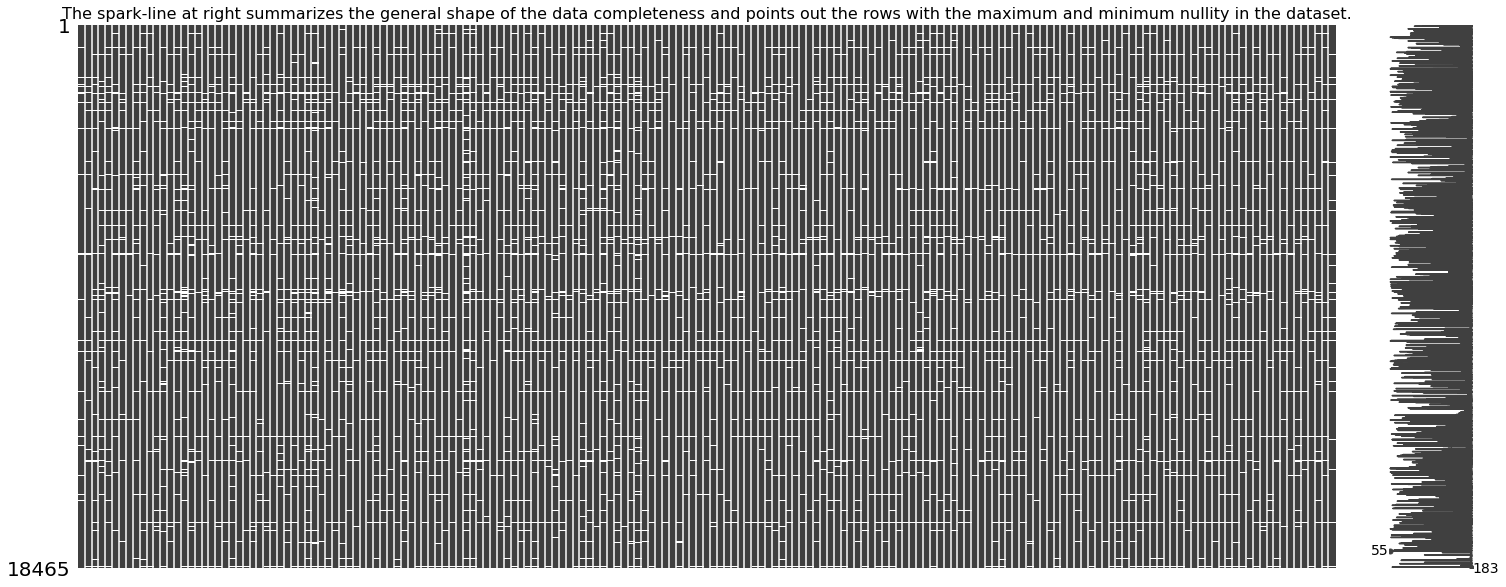

In [8]:
import missingno as msno

#define some general parameters to display with graphs
title_dict={
            'fontsize': 16,
            'verticalalignment': 'baseline',
            'horizontalalignment': 'center'
            }

plot = msno.matrix(PAAD_rna.data_df).set_title(
    'The spark-line at right summarizes the general shape of the data completeness and points out the rows with the maximum and minimum nullity in the dataset.',
    fontdict=title_dict,
    )

In [9]:
# Now that we have a general overview lets filter out non-expressed genes 
expr_df = PAAD_rna.data_df.loc[PAAD_rna.data_df.sum(axis=1) > 0, :]
print(expr_df.shape)

(17984, 183)


In [10]:
'''
Since we observe a difference between this and the original shape of the dataframe let's see which genes are 
NOT expressed
'''

non_expr_df = PAAD_rna.data_df.loc[PAAD_rna.data_df.sum(axis=1) <= 0, :]
display(non_expr_df.index.to_list())

['ACER1',
 'ACSBG2',
 'ADAM21P1',
 'AHSP',
 'AIPL1',
 'AKAP14',
 'AKAP4',
 'AKR1D1',
 'AMAC1L3',
 'ARID3C',
 'ARL13A',
 'ARL5C',
 'ARMS2',
 'ARSF',
 'ART1',
 'ASCL4',
 'ASFMR1',
 'ATP4B',
 'ATP5L2',
 'AWAT2',
 'BET3L',
 'BPIL2',
 'BRD7P3',
 'BRDT',
 'C10orf129',
 'C10orf131',
 'C10orf27',
 'C10orf50',
 'C11orf34',
 'C12orf54',
 'C12orf71',
 'C12orf77',
 'C13orf35',
 'C13orf39',
 'C14orf162',
 'C14orf166B',
 'C14orf178',
 'C14orf39',
 'C15orf53',
 'C15orf5',
 'C16orf73',
 'C16orf82',
 'C17orf102',
 'C17orf64',
 'C17orf88',
 'C17orf98',
 'C19orf34',
 'C1QL2',
 'C1orf105',
 'C1orf129',
 'C1orf180',
 'C1orf227',
 'C1orf64',
 'C1orf87',
 'C20orf123',
 'C20orf141',
 'C20orf144',
 'C21orf121',
 'C2orf80',
 'C3orf20',
 'C3orf24',
 'C3orf43',
 'C3orf48',
 'C3orf49',
 'C3orf50',
 'C3orf65',
 'C4orf50',
 'C5orf47',
 'C5orf52',
 'C6orf103',
 'C6orf195',
 'C6orf25',
 'C7orf16',
 'C7orf34',
 'C7orf65',
 'C7orf69',
 'C7orf71',
 'C8orf56',
 'C8orf74',
 'C9orf144B',
 'C9orf153',
 'C9orf57',
 'C9orf71',

In [11]:
expr_df = expr_df.loc[expr_df.sum(axis=1) > 0, :]
print(expr_df.shape)

# Filter out lowly expressed genes
mask_low_vals = (expr_df > 0.3).sum(axis=1) > 2
expr_df = expr_df.loc[mask_low_vals, :]

print(expr_df.shape)

(17984, 183)
(17984, 183)


# If instead all genes with any NaN values have been removed

0       POM121L10P
1           DHDPSL
2            WDR88
3           PPP3R2
4           AVPR1A
           ...    
4362        ZNF883
4363           CA4
4364           SHD
4365        KHDC1L
4366         SCGBL
Length: 4367, dtype: object

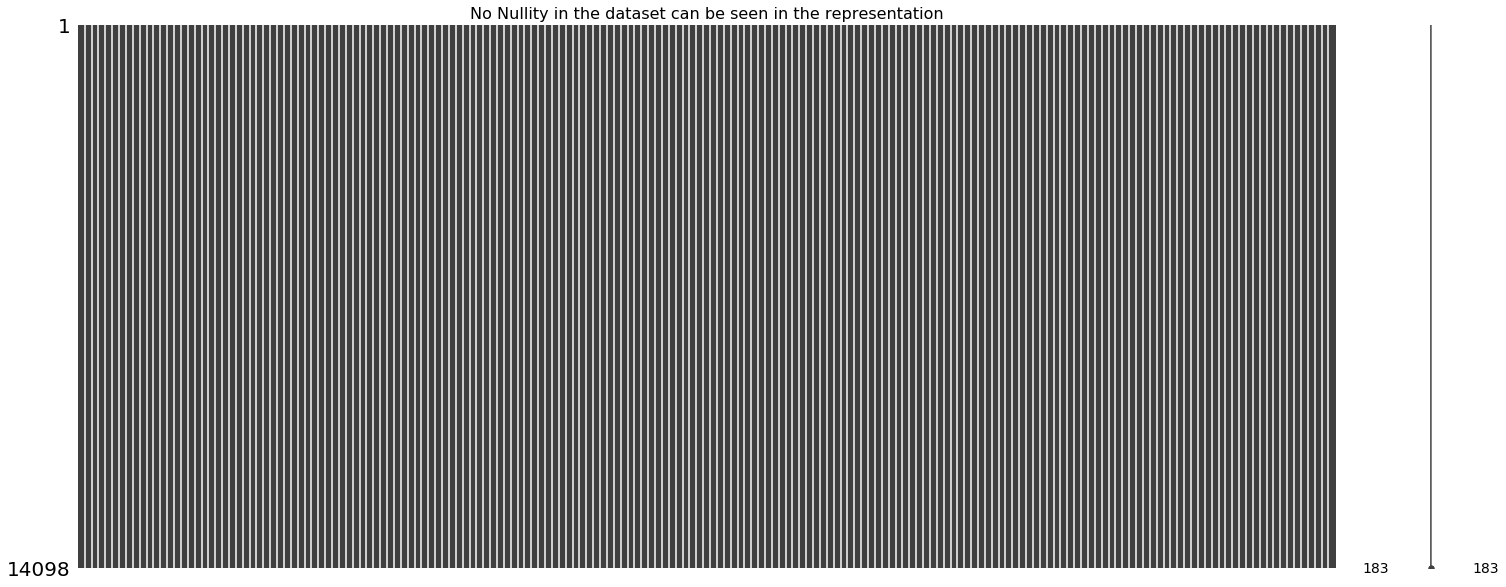

In [12]:
NoNullvalues_df = PAAD_rna.data_df.dropna()

msno.matrix(NoNullvalues_df).set_title(
    'No Nullity in the dataset can be seen in the representation',
    fontdict=title_dict,
    )

#Listing the genes that have been dropped
dropped_genes = set(PAAD_rna.data_df.index.to_list()) - set(NoNullvalues_df.index.to_list())
dropped_genes = pd.Series(list(dropped_genes))
display(dropped_genes)

## Noramlise and Plot a Inital Relationship between genes and Epression Data

Lets normalise the values along the gene expression, rowise (genewise) and plot. 

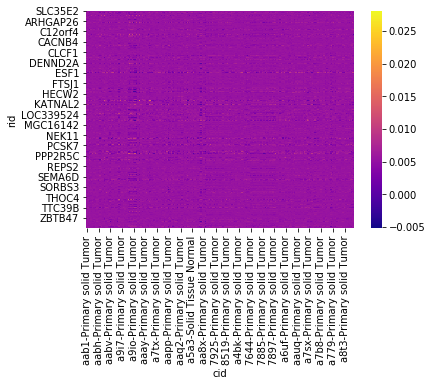

In [13]:
import seaborn as sns

%matplotlib inline

sns.heatmap(NoNullvalues_df.div(NoNullvalues_df.sum(axis=1), axis=0), cmap='plasma')

Since it is too difficlut to infer anything from this graph let's try a different approach 

p-value vs fold

## todo: volcano PLOT

## Identifying Exocrine and Neuroendocrine Cancers 

Using principal component analysis plots.





First let's take a look at the available metadat that should help us make some choices.


In [14]:
display(PAAD_rna.col_metadata_df.columns.to_list())

['participant_id',
 'sample_type',
 'mRNAseq_cluster',
 'bcr_patient_barcode',
 'bcr_patient_uuid',
 'vital_status',
 'days_to_death',
 'days_to_last_followup',
 'additional_studies',
 'adenocarcinoma_invasion',
 'age_at_initial_pathologic_diagnosis',
 'alcohol_history_documented',
 'alcoholic_exposure_category',
 'amount_of_alcohol_consumption_per_day',
 'anatomic_neoplasm_subdivision',
 'anatomic_neoplasm_subdivision_other',
 'b_symptoms',
 'bcr',
 'bcr_aliquot_uuid',
 'bcr_canonical_reason-2',
 'bcr_canonical_reason-3',
 'bcr_canonical_reason',
 'bcr_followup_barcode',
 'bcr_followup_uuid',
 'bcr_patient_canonical_status',
 'clinical_m',
 'clinical_n',
 'clinical_stage',
 'clinical_t',
 'course_number',
 'day_of_dcc_upload',
 'day_of_form_completion',
 'days_to_birth',
 'days_to_diabetes_onset',
 'days_to_index',
 'days_to_initial_pathologic_diagnosis',
 'days_to_pancreatitis_onset',
 'days_to_psa',
 'disease_code',
 'drugs',
 'ethnicity',
 'extranodal_involvement',
 'family_history

In [15]:
#here we observe a few columns of interest we could group our data on in the PCA plot

#Since we want to separtae the Adenocarcinoma from Neuroendocrine lets look at columns clearly mentioning those
print(PAAD_rna.col_metadata_df['adenocarcinoma_invasion'])

cid
aab1-Primary solid Tumor    yes
aab4-Primary solid Tumor    yes
aab6-Primary solid Tumor    yes
aab8-Primary solid Tumor    yes
aab9-Primary solid Tumor    yes
                           ... 
a89d-Solid Tissue Normal    yes
a89d-Primary solid Tumor    yes
a8sy-Primary solid Tumor    yes
a8lh-Primary solid Tumor    yes
aapl-Primary solid Tumor    yes
Name: adenocarcinoma_invasion, Length: 183, dtype: object


Since the sample is too large to perform a PCA without any preprecessing, let's further removed linked samplesi.e genes (if any) and also take a random sample for the same

In [18]:
from sklearn.decomposition import PCA as PCA
from sklearn.preprocessing import StandardScaler
import random

#each column corresponds to a different sample 
expr_df = StandardScaler(expr_df)

#Lets use the data table with no null values
expr_df = NoNullvalues_df

randomseed = random.randint(0,100)
pca_full = PCA(n_components = 5 ,random_state = randomseed).fit(expr_df.T)

principalComponents = pca_full.fit_transform(expr_df.T)

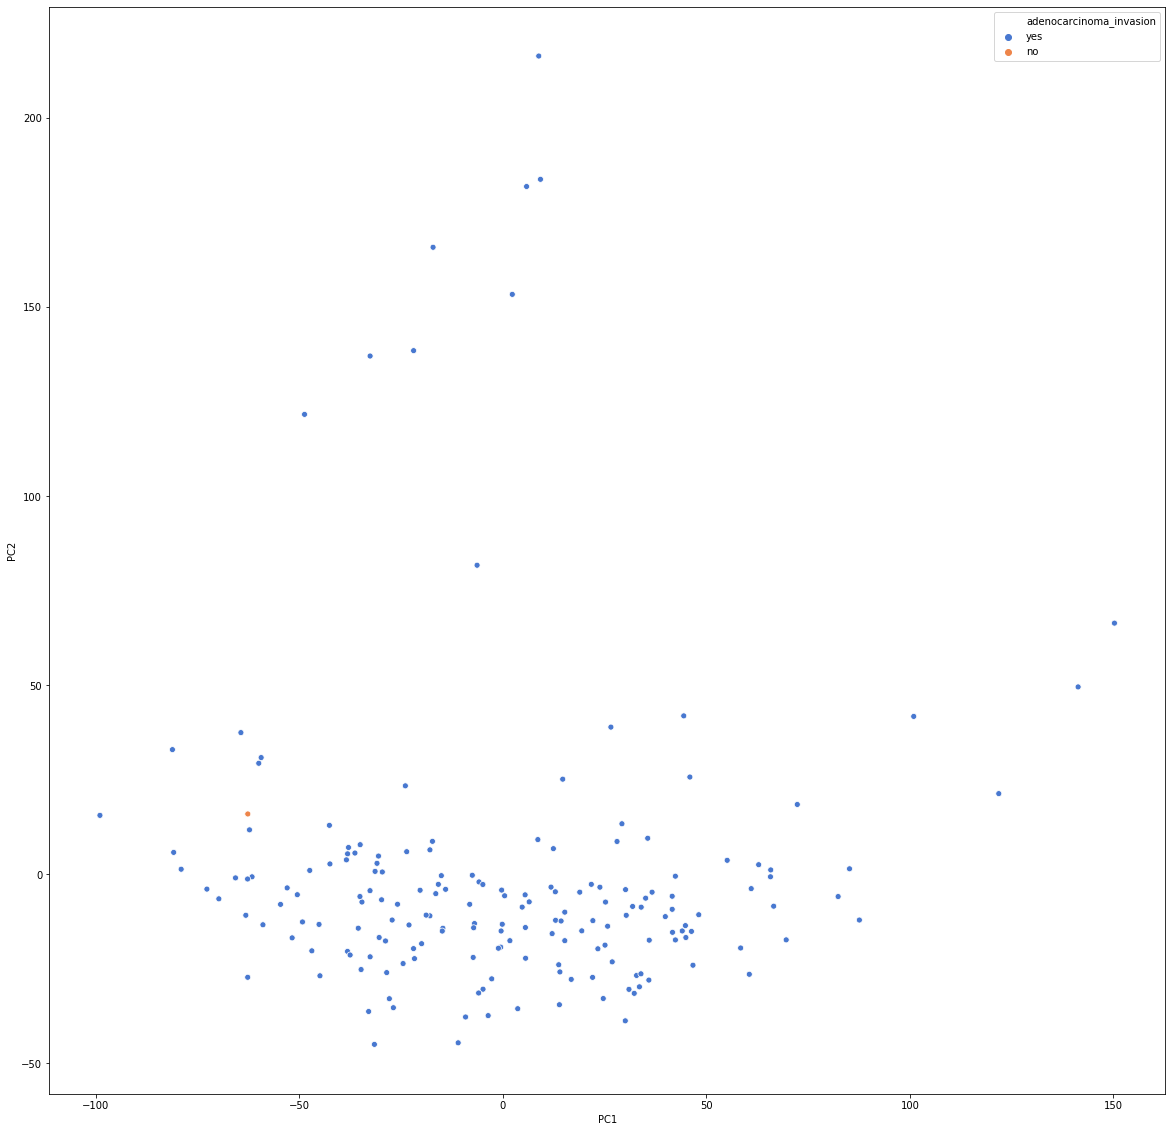

In [27]:
import matplotlib.pyplot as plt


pca_toplot = pd.DataFrame(principalComponents,index=expr_df.T.index).reset_index()
pca_toplot = pca_toplot.merge(PAAD_rna.col_metadata_df['adenocarcinoma_invasion'],on='cid')
pca_toplot.rename(columns={'index':'Sample ID',0:"PC1",1:"PC2",2:"PC3",3:"PC4",4:"PC5"},inplace=True)

plt.gcf().set_size_inches(20, 20)
cmap = sns.color_palette("muted",n_colors=len(list(set(PAAD_rna.col_metadata_df['adenocarcinoma_invasion']))))
sns.scatterplot(pca_toplot["PC1"],pca_toplot["PC2"],hue =pca_toplot["adenocarcinoma_invasion"],palette=cmap)

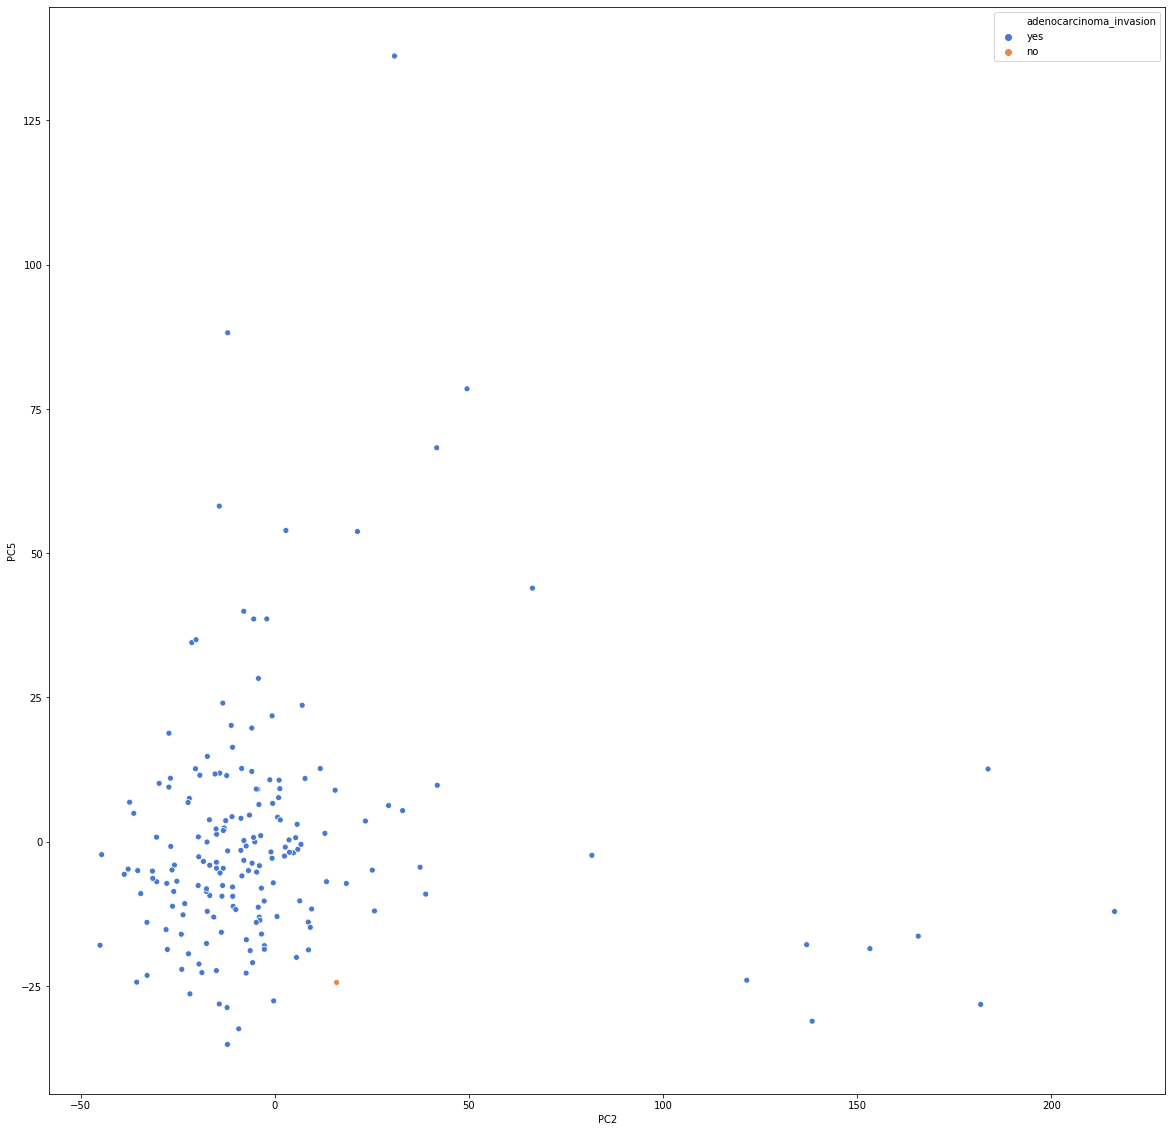

In [31]:
#specify palette
plt.gcf().set_size_inches(20, 20)
sns.scatterplot(pca_toplot["PC2"],pca_toplot["PC5"],hue =pca_toplot["adenocarcinoma_invasion"],palette=cmap)

In [46]:
plt.show()